# Perform Facial Recognition with Deep Learning in Keras Using CNN

### DESCRIPTION
Facial recognition is a biometric alternative that measures unique characteristics of a human face. Applications available today include flight check in, tagging friends and family members in photos, and “tailored” advertising. You are a computer vision engineer who needs to develop a face recognition programme with deep convolutional neural networks.

### Objective: 
Use a deep convolutional neural network to perform facial recognition using Keras.

### Dataset Details:
ORL face database composed of 400 images of size 112 x 92. There are 40 people, 10 images per person. The images were taken at different times, lighting and facial expressions. The faces are in an upright position in frontal view, with a slight left-right rotation.

Link to the Dataset: https://www.dropbox.com/s/i7uzp5yxk7wruva/ORL_faces.npz?dl=0

### Prerequisites:
Keras    
Scikit Learn

### Steps to be followed:
1. Input the required libraries
2. Load the dataset after loading the dataset, you have to normalize every image.
3. Split the dataset
4. Transform the images to equal sizes to feed in CNN
5. Build a CNN model that has 3 main layers:
    - Convolutional Layer
    - Pooling Layer
    - Fully Connected Layer
6. Train the model
7. Plot the result
8. Iterate the model until the accuracy is above 90%


In [1]:
# 1. Input the required libraries

import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical

In [2]:
# 2. Load the dataset

data = np.load("ORL_faces.npz")

data.files

['testY', 'testX', 'trainX', 'trainY']

In [3]:
# After loading the dataset, you have to normalize every image

print("Images before normalizing ('trainX' file):\n", data['trainX'])

# Normalize every image in the dataset
trainX = data['trainX'].astype('float32') / 255 
X_test = data['testX'].astype('float32') / 255

# Load the label of the images
trainY = data['trainY']
y_test = data['testY']

print('\nSize of train dataset (X_train, y_train):', trainX.shape, trainY.shape)
print('\nSize of test dataset (X_test, y_test):', X_test.shape, y_test.shape)

print('\nNumber of classes:', to_categorical(trainY).shape[1])
print("\nLabels of the classes:\n", trainY)

print("\nImages after normalizing ('trainX' file):\n", trainX)


Images before normalizing ('trainX' file):
 [[ 48.  49.  45. ...  47.  46.  46.]
 [ 60.  60.  62. ...  32.  34.  34.]
 [ 39.  44.  53. ...  29.  26.  29.]
 ...
 [114. 117. 114. ...  98.  96.  98.]
 [105. 105. 107. ...  54.  47.  41.]
 [116. 114. 117. ...  95. 100. 101.]]

Size of train dataset (X_train, y_train): (240, 10304) (240,)

Size of test dataset (X_test, y_test): (160, 10304) (160,)

Number of classes: 20

Labels of the classes:
 [ 0  0  0  0  0  0  0  0  0  0  0  0  1  1  1  1  1  1  1  1  1  1  1  1
  2  2  2  2  2  2  2  2  2  2  2  2  3  3  3  3  3  3  3  3  3  3  3  3
  4  4  4  4  4  4  4  4  4  4  4  4  5  5  5  5  5  5  5  5  5  5  5  5
  6  6  6  6  6  6  6  6  6  6  6  6  7  7  7  7  7  7  7  7  7  7  7  7
  8  8  8  8  8  8  8  8  8  8  8  8  9  9  9  9  9  9  9  9  9  9  9  9
 10 10 10 10 10 10 10 10 10 10 10 10 11 11 11 11 11 11 11 11 11 11 11 11
 12 12 12 12 12 12 12 12 12 12 12 12 13 13 13 13 13 13 13 13 13 13 13 13
 14 14 14 14 14 14 14 14 14 14 14 14 15 15 15 

In [4]:
# 3. Split the dataset

X_train, X_val, y_train, y_val = train_test_split(trainX, trainY, test_size=0.2, random_state=42)
print("Shape of X_train, y_train, X_val, y_val =", X_train.shape, y_train.shape, X_val.shape, y_val.shape)

Shape of X_train, y_train, X_val, y_val = (192, 10304) (192,) (48, 10304) (48,)


In [5]:
# 4. Transform the images to equal sizes to feed in CNN

# Size of image is 112 x 92
image_rows = 112  
image_cols = 92
image_shape = (image_rows, image_cols, 1)

# Transform the images to equal sizes
X_train = X_train.reshape(X_train.shape[0], *image_shape)
X_test = X_test.reshape(X_test.shape[0], *image_shape)
X_val = X_val.reshape(X_val.shape[0], *image_shape)


In [40]:
# Function to visualize an image
def show_image(img_array):
    """
    Display the image specified in the img_array
    """
    # Convert the NumPy array to a tensor image array
    img = tf.convert_to_tensor(img_array)
    
    # Set the figure size to be (2, 2)
    plt.figure(figsize=(3, 3))
    # Remove the axis ticks
    plt.axis(False)   
    
    # Show the image
    plt.imshow(img, cmap='gray');

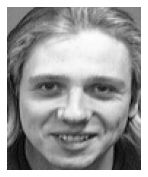

In [41]:
show_image(X_train[0])

In [8]:
# 5. Build a CNN model that has 3 main layers:
#      Convolutional Layer
#      Pooling Layer
#      Fully Connected Layer
# image_shape = (image_rows, image_cols, 1)  = (112, 92, 1)

# Create model and add 2 sets of Convolutional and Pooling layers
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same', input_shape=image_shape))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=2))

# Add the fully connected layers to the model

model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(20, activation='softmax'))            # there are 20 classes in the Train and Test dataset


In [9]:
# Showing model parameters

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 112, 92, 32)       320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 56, 46, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 46, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 28, 23, 32)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 20608)             0         
                                                                 
 dense (Dense)               (None, 1024)              2

In [10]:
# Compile the model

model.compile(optimizer=tf.optimizers.legacy.Adam(),
              loss=tf.losses.SparseCategoricalCrossentropy(),
              metrics=['accuracy'])


### Train the model and iterate the model until the accuracy is above 90%
Training the model for 50 epochs will have an accuracy above 90%

In [11]:
# 6. Train the model

NUM_EPOCHS=50

history = model.fit(x=X_train, 
                    y=y_train, 
                    epochs=NUM_EPOCHS,
                    validation_data=(X_val, y_val)
                   )

# 8. Iterate the model until the accuracy is above 90%
#    Training 50 epochs will have accuracy more than 90%

Epoch 1/50
6/6 [==============================] - 1s 171ms/step - loss: 3.5624 - accuracy: 0.0469 - val_loss: 3.0291 - val_accuracy: 0.1042
Epoch 2/50
6/6 [==============================] - 1s 114ms/step - loss: 3.0609 - accuracy: 0.0625 - val_loss: 2.9895 - val_accuracy: 0.0833
Epoch 3/50
6/6 [==============================] - 1s 170ms/step - loss: 2.9807 - accuracy: 0.0677 - val_loss: 2.9872 - val_accuracy: 0.1667
Epoch 4/50
6/6 [==============================] - 1s 142ms/step - loss: 2.9687 - accuracy: 0.1250 - val_loss: 2.9669 - val_accuracy: 0.1875
Epoch 5/50
6/6 [==============================] - 1s 124ms/step - loss: 2.9312 - accuracy: 0.1406 - val_loss: 2.9207 - val_accuracy: 0.2292
Epoch 6/50
6/6 [==============================] - 1s 141ms/step - loss: 2.8344 - accuracy: 0.1615 - val_loss: 2.7936 - val_accuracy: 0.3125
Epoch 7/50
6/6 [==============================] - 1s 116ms/step - loss: 2.6948 - accuracy: 0.2500 - val_loss: 2.4928 - val_accuracy: 0.4375
Epoch 8/50
6/6 [====

In [36]:
# Define a function to plot the results

# Plot training and validation accuracy and loss curves
def plot_accuracy_loss_curves(history):
    """
    Display the accuracy and loss curves for the training and validation metrics.
    """
    accuracy = history.history["accuracy"]
    val_accuracy = history.history["val_accuracy"]
    
    loss = history.history["loss"]
    val_loss = history.history["val_loss"]
    
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
    plt.subplots_adjust(top=0.85, wspace=0.4)

    fig.suptitle("Accuracy and Loss Curves for Training and Validation Metrics", 
                 fontweight='bold', fontsize='20')
    
    epochs = range(1, len(history.history["accuracy"]) + 1) # how many epochs we run for?

    # Plot accuracy
    ax1.plot(epochs, accuracy, label="training_accuracy")
    ax1.plot(epochs, val_accuracy, label="val_accuracy")
    ax1.set_title("Accuracy Curve", fontweight='bold', fontsize='18')
    ax1.set_xlabel("epochs", fontsize='14')
    ax1.set_ylabel("accuracy", fontsize='14')
    ax1.legend(fontsize=11)
    
    # Plot loss
    ax2.plot(epochs, loss, label="training_loss")
    ax2.plot(epochs, val_loss, label="val_loss")
    ax2.set_title("Loss Curve", fontweight='bold', fontsize='18')
    ax2.set_xlabel("epochs", fontsize='14')
    ax2.set_ylabel("loss", fontsize='14')
    ax2.legend(fontsize=11);
    

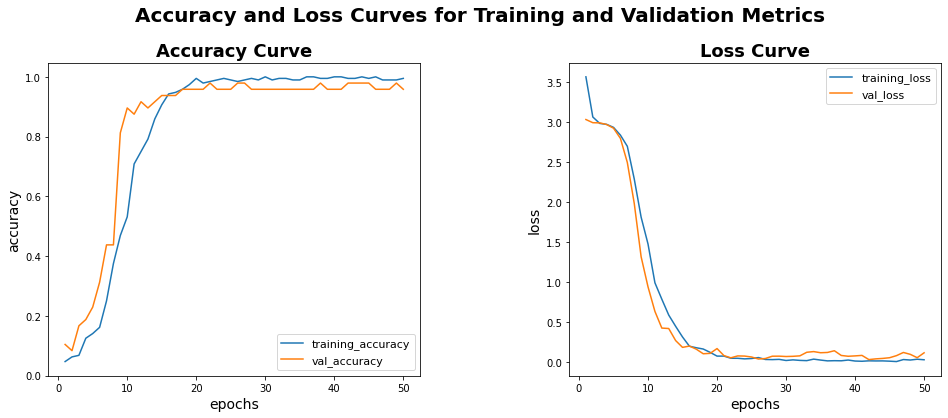

In [37]:
# 7. Plot the result

plot_accuracy_loss_curves(history)

In [14]:
# Evaluate the model

test_loss, test_accuracy = model.evaluate(X_test, y_test)

print("Loss:", test_loss, "; Accuracy:", test_accuracy)

5/5 [==============================] - 0s 32ms/step - loss: 0.2179 - accuracy: 0.9563
Loss: 0.2178962230682373 ; Accuracy: 0.956250011920929


## Predict and display image in the test dataset

5/5 [==============================] - 1s 28ms/step
Predicted person is: 6 
   Actual person is: 6


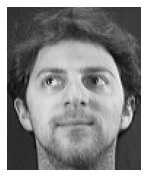

In [42]:
# Get predictions for all the images in the test dataset

predictions = model.predict(X_test)

# Get the prediction for image 50 from predictions
pred = np.argmax(predictions[50])

# Get actual image number from y_test label
actual = y_test[50]

print('Predicted person is:', pred, '\n   Actual person is:', actual)
show_image(X_test[50])

In [49]:
import random

# Function to randomly predict and plot 20 images
def predict_and_plot_random_images(images, actuals, predictions):
    """
    Picks a random image, plots it and labels it with a prediction and actual label.
    """
    
    # Set figure size for plot
    plt.figure(figsize=(14, 18))

    # Show 20 images (4 images per row in 5 rows)
    for i in range(20):
        # Set up random integer
        r = random.randint(0, len(images) - 1)

        # Create predictions and targets
        target_image = images[r]  # image

        # Get prediction image number
        pred = np.argmax(predictions[r])      # Predicted person number
        pred_prob = np.max(predictions[r])    # Probability of prediction for predicted person
                         
        # Get actual image number
        actual = actuals[r]                   # Actual person number - get from y labels
        
        # Specify the subplot to show image in
        plt.subplot(5, 4, i+1)
        plt.tight_layout(h_pad=0.05)
        
        # Plot the image with xticks and yticks set to blank
        plt.imshow(target_image, cmap='gray')
        plt.xticks([])
        plt.yticks([])

        # Change the color of labels depending on if the prediction is right or wrong
        if pred == actual:
            color = "green"
        else:
            color = "red"

        # Add xlabel information (prediction/true label)
        plt.xlabel("Pred: Person {} ({:2.0f}%) \nActual: Person {} (index {})".format(pred, 100*pred_prob, actual, r),
                   color=color, fontsize=13)  # set the color to green or red based on whether prediction is right or wrong


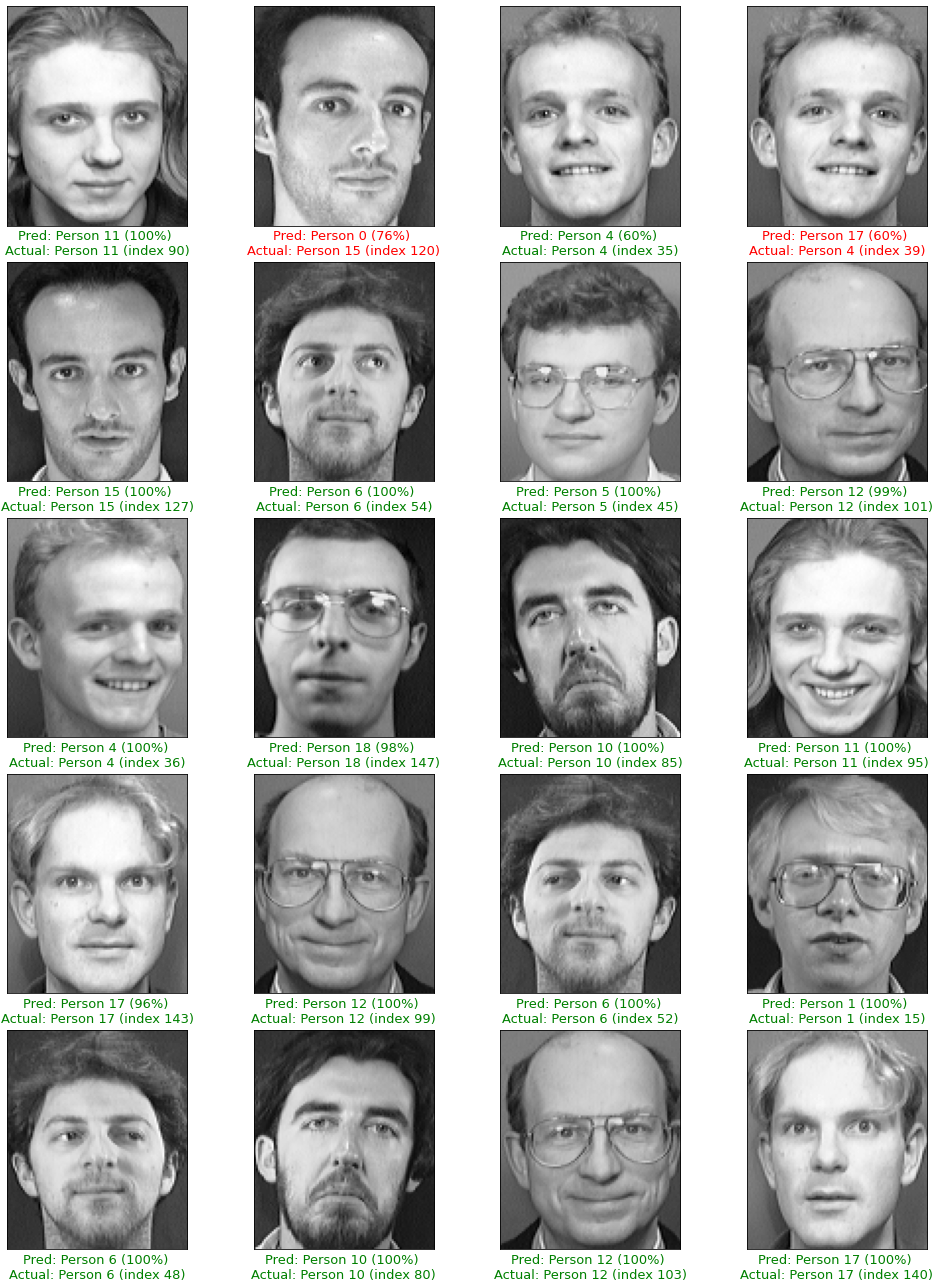

In [50]:
# Predict and plot random images from the test dataset 
# with its actual and predicted image comparison

predict_and_plot_random_images(X_test, y_test, predictions)